<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/12_coloquio_machine_learnig/blob/main/4_coloquio_feb_27_redes_neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

### [Video de apoyo a la lectura experimental de este cuaderno](https://www.youtube.com/watch?v=YJF8ICZjBDs)

# Binary operators and comparisons 

Most of the binary math operations and comparisons are as you might expect:


In [19]:
6-4 # restar

2

In [2]:
7+3   # sumar 

10

In [4]:
1<=2  # utilizar operadores de comparación

True

See Table 2-3 for all of the available binary operators

<img src = 'https://github.com/marco-canas/12_coloquio_machine_learnig/blob/main/table_2_3_1_binary_operators.png?raw=true'>

<img src = 'https://github.com/marco-canas/12_coloquio_machine_learnig/blob/main/table_2_3_2_binary_operators.png?raw=true'>

To check if two references refer to the same object, use the is keyword. is not is also perfectly valid if you want to check that two objects are not the same:


In [4]:
a = [1,2,3]

In [8]:
b = a

In [7]:
c = list(a)

In [8]:
a is b

True

In [9]:
a==c

True

In [10]:
a is not c 

True

Since `list` always creates a new Python list (i.e., a copy), we can be sure that c is distinct from a. Comparing with is is not the same as the `==` operator, because in this case we have:

In [10]:
a==c

True

In [11]:
c[0] = 2

In [12]:
c 

[2, 2, 3]

In [13]:
a 

[1, 2, 3]

In [14]:
b[0] = 89

In [15]:
a 

[89, 2, 3]

In [16]:
b

[89, 2, 3]

A very common use of `is` and `is not` is to check if a variable is None, since there is only one instance of `None`

In [17]:
a = None 

In [18]:
a is None 

True

# Mutable and immutable objects  

Most objects in Python, such as lists, dicts, NumPy arrays, and most user-defined
types (classes), are mutable. This means that the object or values that they contain can
be modified:


In [ ]:
a_list = ['foo', 2, 3, [4,5]]

In [ ]:
a_list[2] = (3,4)

In [ ]:
a_list 

# Building an Image Classifier Using the Sequential API

First, we need to load a dataset. In this chapter we will tackle Fashion MNIST, which is a drop-in replacement of MNIST (introduced in Chapter 3). 

It has the exact same format as MNIST (70,000 grayscale images of $28 \times 28$ pixels each, with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is more diverse, and the problem turns out to be significantly more challenging than MNIST.

For example, a simple linear model reaches about 92% accuracy on MNIST, but only about 83% on Fashion MNIST.

# Using Keras to load the dataset


Keras provides some utility functions to fetch and load common datasets, including MNIST, Fashion MNIST, and the California housing dataset we used in Chapter 2. Let’s load Fashion MNIST:


In [24]:
import tensorflow as tf
from tensorflow import keras 

In [25]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


When loading MNIST or Fashion MNIST using Keras rather than ScikitLearn, one important difference is that every image is represented as a $28 \times 28$ array rather than a 1D array of size 784. 

Moreover, the pixel intensities are represented as integers (from 0 to 255) rather than floats (from 0.0 to 255.0). 

Let’s take a look at the shape and data type of the training set:

In [26]:
X_train_full.shape

(60000, 28, 28)

In [27]:
X_train_full.dtype

dtype('uint8')

Note that the dataset is already split into a training set and a test set, but there is no validation set, so we’ll create one now. 

Additionally, since we are going to train the neural network using Gradient Descent, we must scale the input features. 

For simplicity, we’ll scale the pixel intensities down to the 0–1 range by dividing them by 255.0 (this also converts them to floats):

In [28]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


With MNIST, when the label is equal to 5, it means that the image represents the handwritten digit 5. Easy. 

For Fashion MNIST, however, we need the list of class names to know what we are dealing with:

In [29]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


For example, the first image in the training set represents a coat:


In [30]:
class_names[y_train[0]]

'Coat'

Figure 10-11 shows some samples from the Fashion MNIST dataset.

Let's take a look at a sample of the images in the dataset:

In [32]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "ann"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

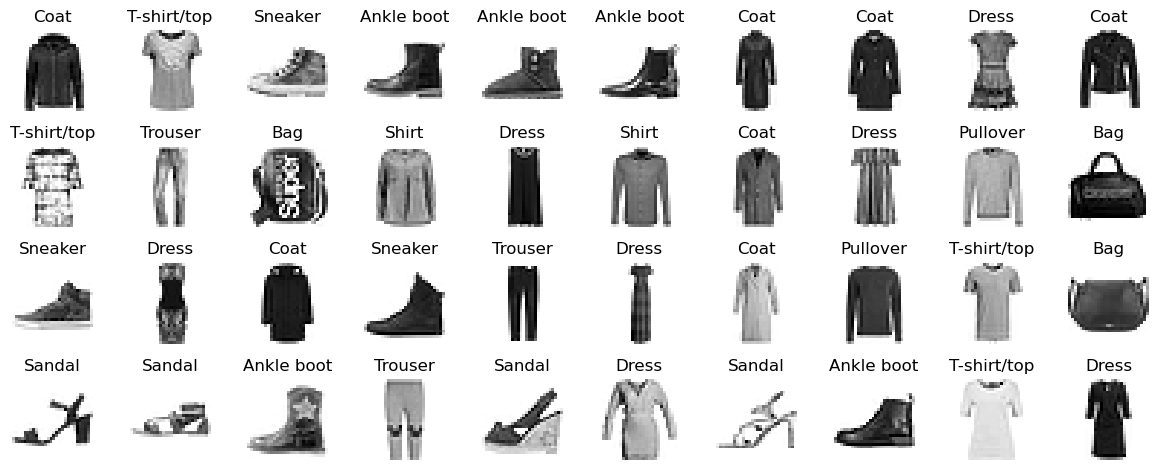

In [33]:
# extra code – this cell generates and saves Figure 10–10
import matplotlib.pyplot as plt 
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

save_fig("fashion_mnist_plot")
plt.show()

# Creating the model using the Sequential API

Now let’s build the neural network! Here is a classification MLP with two hidden layers:

In [3]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

NameError: name 'keras' is not defined

Let’s go through this code line by line:  

* The first line creates a Sequential model. This is the simplest kind of Keras model for neural networks that are just composed of a single stack of layers connected sequentially. This is called the Sequential API.  

* Next, we build the first layer and add it to the model. It is a Flatten layer whose role is to convert each input image into a 1D array: if it receives input data X, it computes X.reshape(-1, 1).
This layer does not have any parameters; it is just there to do some simple preprocessing. Since it is the first layer in the model, you should specify the input_shape, which doesn’t include the batch size, only the shape of the instances. Alternatively, you could add a keras.layers.InputLayer as the first layer, setting `input_shape=[28,28]`.


Next we add a Dense hidden layer with 300 neurons. It will use the ReLU activation function. Each Dense layer manages its own
weight matrix, containing all the connection weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron). When it receives some input data, it computes Equation 10-2.

Then we add a second Dense hidden layer with 100 neurons, also using the ReLU activation function.
Finally, we add a Dense output layer with 10 neurons (one per class), using the softmax activation function (because the classes
are exclusive).

## TIP  

Specifying activation="relu" is equivalent to specifying `activation=keras.activations.relu`. Other activation functions are available in the keras.activations package, we will use many of them in this book. See https://keras.io/activations/ for the full list.


Instead of adding the layers one by one as we just did, you can pass a list of layers when creating the Sequential model:

In [37]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])


# USING CODE EXAMPLES FROM KERAS.IO

Code examples documented on keras.io will work fine with tf.keras, but you need to change the imports. For example, consider this keras.io code:

In [19]:
from keras.layers import Dense
output_layer = Dense(10)

You must change the imports like this:

In [34]:
from tensorflow.keras.layers import Dense
output_layer = Dense(10)

Or simply use full paths, if you prefer:

In [35]:
from tensorflow import keras
output_layer = keras.layers.Dense(10)

This approach is more verbose, but I use it in this book so you can
easily see which packages to use, and to avoid confusion between
standard classes and custom classes. In production code, I prefer the
previous approach. Many people also use from tensorflow.keras
import layers followed by layers.Dense(10).

The model’s summary() method displays all the model’s layers, including each layer’s name (which is automatically generated unless you set it when creating the layer), its output shape (None means the batch size can be anything), and its number of parameters. 

The summary ends with the total number of parameters, including trainable and non-trainable parameters.
Here we only have trainable parameters (we will see examples of nontrainable parameters in Chapter 11):

In [38]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
